In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns

from statsbombpy import sb
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
free_comps = sb.competitions()
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [4]:
euro_2024 = sb.matches(competition_id=55, season_id=282).sort_values(by='match_date')
euro_2024.head()


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
50,3930158,2024-06-14,22:00:00.000,Europe - UEFA Euro,2024,Germany,Scotland,5,1,available,...,2024-07-04T08:13:19.028344,1,Group Stage,Allianz Arena,Clément Turpin,Julian Nagelsmann,Steve Clarke,1.1.0,2,2
48,3930160,2024-06-15,19:00:00.000,Europe - UEFA Euro,2024,Spain,Croatia,3,0,available,...,2024-07-12T03:40:20.513429,1,Group Stage,Olympiastadion Berlin,Michael Oliver,Luis de la Fuente Castillo,Zlatko Dalić,1.1.0,2,2
28,3930161,2024-06-15,22:00:00.000,Europe - UEFA Euro,2024,Italy,Albania,2,1,available,...,2024-07-12T05:16:16.043874,1,Group Stage,Signal-Iduna-Park,Felix Zwayer,Luciano Spalletti,Sylvio Mendes Campos Junior,1.1.0,2,2
49,3930159,2024-06-15,16:00:00.000,Europe - UEFA Euro,2024,Hungary,Switzerland,1,3,available,...,2024-07-10T13:35:35.263551,1,Group Stage,RheinEnergieStadion,Slavko Vinčić,Marco Rossi,Murat Yakin,1.1.0,2,2
47,3930162,2024-06-16,19:00:00.000,Europe - UEFA Euro,2024,Slovenia,Denmark,1,1,available,...,2024-07-10T16:09:27.468163,1,Group Stage,MHPArena,Sandro Schärer,Matjaž Kek,Kasper Hjulmand,1.1.0,2,2


In [5]:
#create a variable for the team you want to look into
team="Portugal"

#filter for only matches that the focus team played in
matches_df = euro_2024[(euro_2024['home_team'] == team)|(euro_2024['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [6]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.iloc[0]

In [7]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=latest_match_id)

#print the first 5 rows of data
events_df.head(5)

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4411, 'lineup': [{'player': {'id...",Portugal,780,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:00:00.000,Half Start,NaN


In [8]:
#print a list of columns available in the event data
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 

In [9]:
#split coordinates into two separate columns
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

# Passes and Carries into the Final Third

"Which players progressed the ball into the final third the most?"

In [10]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes

f3rd_passes = events_df[(events_df.team==team) & (events_df.type=="Pass") & (events_df.x<80) & (events_df.pass_end_x>80) & (events_df.pass_outcome.isna())]

f3rd_passes_count = f3rd_passes.groupby('player').size().reset_index()

In [11]:
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [12]:
f3rd_passes_count

,player,Passes
0,Bernardo Mota Veiga de Carvalho e Silva,2
1,Bruno Miguel Borges Fernandes,1
2,Cristiano Ronaldo dos Santos Aveiro,2
3,Francisco Fernandes Conceição,1
4,João Maria Lobo Alves Palhinha Gonçalves,5
5,João Pedro Cavaco Cancelo,4
6,Kléper Laveran Lima Ferreira,3
7,Nuno Mendes,11
8,Nélson Cabral Semedo,1
9,Rafael Alexandre Conceição Leão,7


In [13]:
#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [14]:
f3rd_carries_count

,player,Carries
0,Bernardo Mota Veiga de Carvalho e Silva,2
1,Bruno Miguel Borges Fernandes,1
2,Cristiano Ronaldo dos Santos Aveiro,3
3,João Pedro Cavaco Cancelo,3
4,Nuno Mendes,4
5,Nélson Cabral Semedo,4
6,Rafael Alexandre Conceição Leão,3
7,Rúben Santos Gato Alves Dias,1
8,Vitor Machado Ferreira,4


In [15]:
#combine dataframes
progressions_df=pd.merge(f3rd_passes_count, f3rd_carries_count, how="outer", on=["player"])

In [16]:
progressions_df

,player,Passes,Carries
0,Bernardo Mota Veiga de Carvalho e Silva,2,2.0
1,Bruno Miguel Borges Fernandes,1,1.0
2,Cristiano Ronaldo dos Santos Aveiro,2,3.0
3,Francisco Fernandes Conceição,1,NaN
4,João Maria Lobo Alves Palhinha Gonçalves,5,NaN
5,João Pedro Cavaco Cancelo,4,3.0
6,Kléper Laveran Lima Ferreira,3,NaN
7,Nuno Mendes,11,4.0
8,Nélson Cabral Semedo,1,4.0
9,Rafael Alexandre Conceição Leão,7,3.0


In [17]:
#add 0 where value is NaN
progressions_df=progressions_df.fillna(0)

In [18]:
progressions_df

,player,Passes,Carries
0,Bernardo Mota Veiga de Carvalho e Silva,2,2.0
1,Bruno Miguel Borges Fernandes,1,1.0
2,Cristiano Ronaldo dos Santos Aveiro,2,3.0
3,Francisco Fernandes Conceição,1,0.0
4,João Maria Lobo Alves Palhinha Gonçalves,5,0.0
5,João Pedro Cavaco Cancelo,4,3.0
6,Kléper Laveran Lima Ferreira,3,0.0
7,Nuno Mendes,11,4.0
8,Nélson Cabral Semedo,1,4.0
9,Rafael Alexandre Conceição Leão,7,3.0


In [19]:
#add a new column with the total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']
progressions_df

,player,Passes,Carries,total
0,Bernardo Mota Veiga de Carvalho e Silva,2,2.0,4.0
1,Bruno Miguel Borges Fernandes,1,1.0,2.0
2,Cristiano Ronaldo dos Santos Aveiro,2,3.0,5.0
3,Francisco Fernandes Conceição,1,0.0,1.0
4,João Maria Lobo Alves Palhinha Gonçalves,5,0.0,5.0
5,João Pedro Cavaco Cancelo,4,3.0,7.0
6,Kléper Laveran Lima Ferreira,3,0.0,3.0
7,Nuno Mendes,11,4.0,15.0
8,Nélson Cabral Semedo,1,4.0,5.0
9,Rafael Alexandre Conceição Leão,7,3.0,10.0


In [20]:
#sort to get the top players at the top
progressions_df.sort_values(by='total', ascending=False, inplace=True)
progressions_df

,player,Passes,Carries,total
7,Nuno Mendes,11,4.0,15.0
9,Rafael Alexandre Conceição Leão,7,3.0,10.0
10,Rúben Diogo Da Silva Neves,10,0.0,10.0
11,Rúben Santos Gato Alves Dias,7,1.0,8.0
12,Vitor Machado Ferreira,4,4.0,8.0
5,João Pedro Cavaco Cancelo,4,3.0,7.0
2,Cristiano Ronaldo dos Santos Aveiro,2,3.0,5.0
4,João Maria Lobo Alves Palhinha Gonçalves,5,0.0,5.0
8,Nélson Cabral Semedo,1,4.0,5.0
0,Bernardo Mota Veiga de Carvalho e Silva,2,2.0,4.0


## VIZ

<Figure size 1500x1500 with 0 Axes>

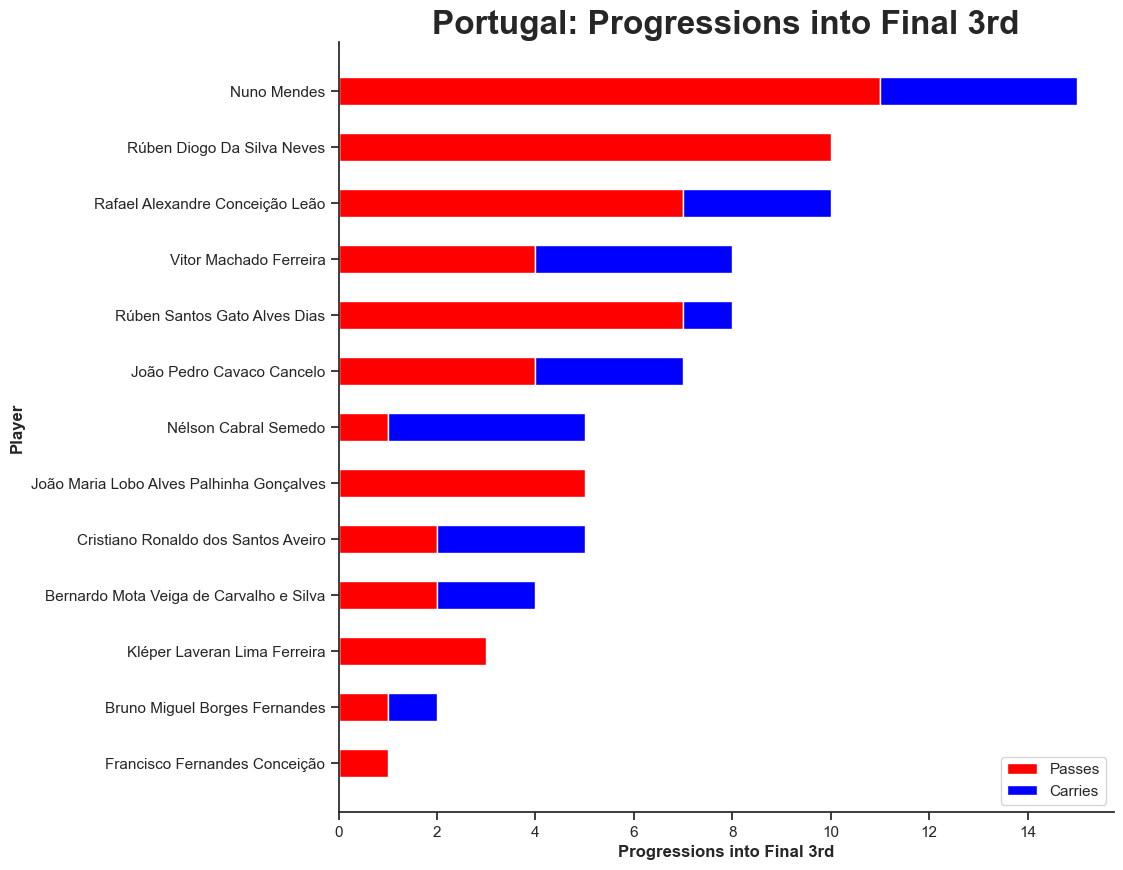

In [31]:
#create stacked bar chart
pass_colour='red'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
progressions_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#plot bar chart - using barchart_df dataframe
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add titles and axis labels
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})


sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

## VIZ of a given Player

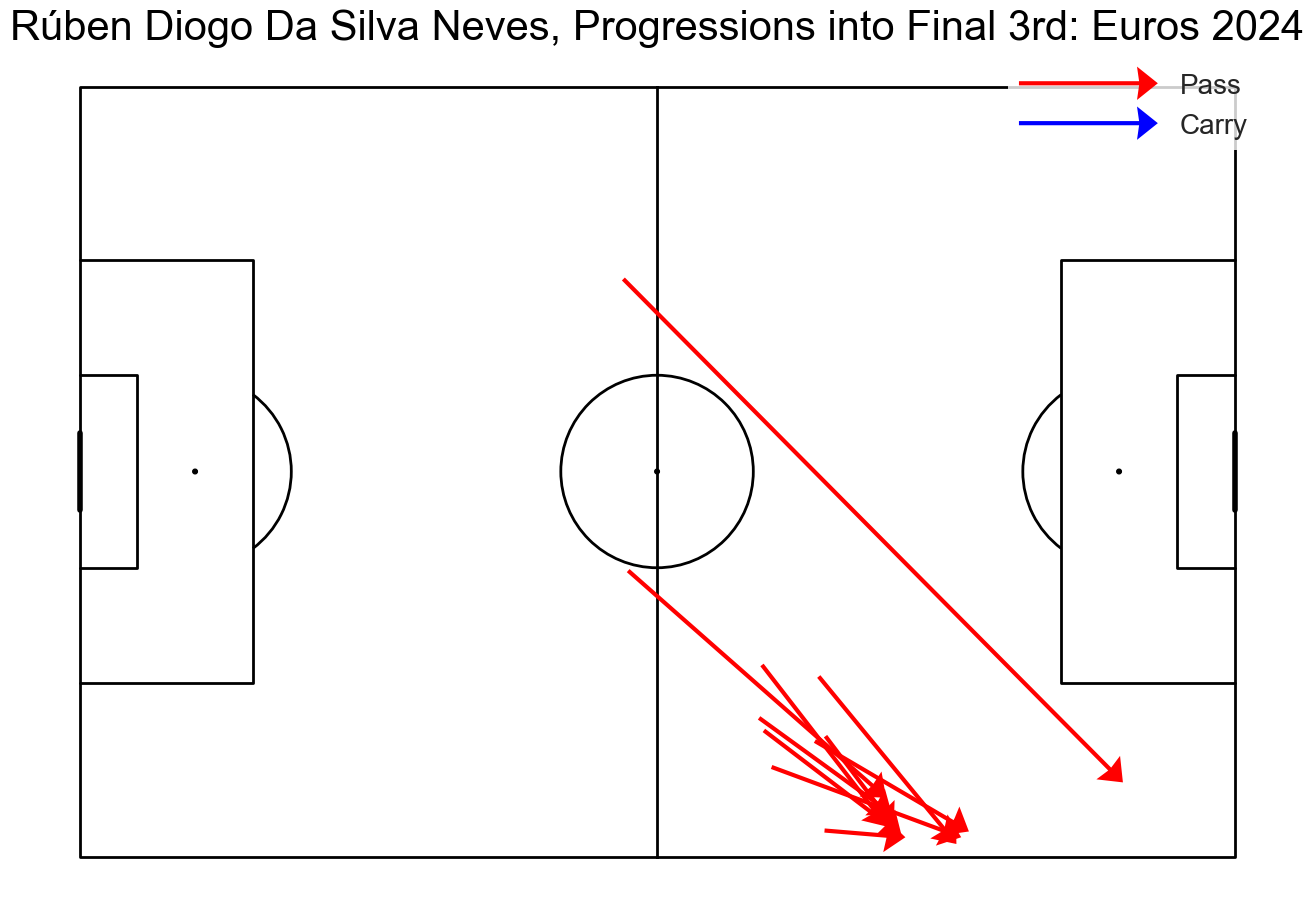

In [23]:
#visualise for a given player
player_name="Rúben Diogo Da Silva Neves"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name}, Progressions into Final 3rd: Euros 2024', fontsize=30,color='black')